In [52]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt



In [14]:
crime_df= "https://opendata.charlottesville.org/datasets/charlottesville::crime-data.csv?download=true"
arrest_df= "https://opendata.charlottesville.org/datasets/d558ab0e09fe4f509280bedf6f8793ed_22.csv?download=true"

In [17]:
crime_df = pd.read_csv(crime_url)
arrest_df = pd.read_csv(arrest_url)

In [30]:
crime_df = crime_df        
arrest_df = arrest_df     

crime_df.head()
arrest_df

,arrestid,arrestdatetime,firstname,housenumber,lastname,middlename,namesuffix,race,sex,statute,statutedescription,street
0,1,2025-10-20 19:46:00+00:00,PAUL,927.0,BROWN,JAMES,Jr,White,Male,18.2-57.2(A),Domestic Assault - Simple,BELMONT AVE A
1,2,2025-10-20 19:40:00+00:00,KEITH,722.0,MOSINIAK,LAWRENCE,NaN,Black,Male,46.2-924,TRAFFIC:VIOLATE PEDESTRIAN RIGHT-OF-WAY,MADISON AVE A
2,3,2025-10-19 22:14:00+00:00,CHRISTOPHER,160.0,EDWARDS,TODD,NaN,White,Male,18.2-95(ii),GRAND LARCENY - $200 or more not from person,PEREGORY LN
3,4,2025-10-19 22:05:00+00:00,MATTHEW,160.0,BRESSACK,KENNA,NaN,White,Unknown,18.2-95(ii),GRAND LARCENY - $200 or more not from person,PEREGORY LN
4,5,2025-10-19 22:05:00+00:00,MATTHEW,160.0,BRESSACK,KENNA,NaN,White,Unknown,18.2-96(2),Petit Larceny Less than $1000 not from person,PEREGORY LN
...,...,...,...,...,...,...,...,...,...,...,...,...
11354,11355,2020-10-24 00:15:00+00:00,ISAIAH,160.0,AMOS,LAMONT,NaN,Black,Male,19.2-305.2,FAIL TO PAY RESTITUTION,PEREGORY LN
11355,11356,2020-10-23 19:57:00+00:00,MATTHEW,750.0,BRESSACK,KENNA,NaN,White,Unknown,53.1-149,PB-15 FELONY,HARRIS ST 202
11356,11357,2020-10-23 12:53:00+00:00,ISAIAH,1154.0,AMOS,LAMONT,NaN,Black,Male,966,WARRANT SERVICE,5TH ST SW
11357,11358,2020-10-23 02:40:00+00:00,ANDREW,2511.0,SAUNDERS,CHRISTOPHER,Jr,White,Male,18.2-57(A),Simple Assault - Citizen,CLAY ST


In [26]:
# CLEAN 
# Standardize column names
crime_df.columns = crime_df.columns.str.strip().str.lower()
arrest_df.columns = arrest_df.columns.str.strip().str.lower()

# Convert date columns
crime_df['datereported'] = pd.to_datetime(crime_df['datereported'], errors='coerce')
arrest_df['arrestdatetime'] = pd.to_datetime(arrest_df['arrestdatetime'], errors='coerce')

# Offense columns 
crime_offense_col = "offense"
arrest_offense_col = "statutedescription"   

In [29]:
crime_df.head()


,recordid,offense,incidentid,blocknumber,streetname,agency,datereported,hourreported,reportingofficer
0,1,Assist Citizen - Mental/TDO/ECO,202500023705,2100.0,"MICHIE DR, 35B",CPD,2025-07-08 21:23:03+00:00,1723,"Crowley, Raeann"
1,2,Shots Fired/Illegal Hunting,202500023699,600.0,10 1/2 ST NW,CPD,2025-07-08 20:48:27+00:00,1648,"Curry, Brian"
2,3,Sex Offense - Forcible Sodomy,202500023694,200.0,2ND ST NW,CPD,2025-07-08 20:35:32+00:00,1635,"O'Briant, Landon"
3,4,Vandalism,202500023691,1100.0,E MARKET ST,CPD,2025-07-08 20:22:29+00:00,1622,"Benbow, Lauren"
4,5,Larceny - Shoplifitng,202500023686,500.0,W MAIN ST,CPD,2025-07-08 20:12:33+00:00,1612,"Benbow, Lauren"


In [31]:
arrest_df.head()

,arrestid,arrestdatetime,firstname,housenumber,lastname,middlename,namesuffix,race,sex,statute,statutedescription,street
0,1,2025-10-20 19:46:00+00:00,PAUL,927.0,BROWN,JAMES,Jr,White,Male,18.2-57.2(A),Domestic Assault - Simple,BELMONT AVE A
1,2,2025-10-20 19:40:00+00:00,KEITH,722.0,MOSINIAK,LAWRENCE,NaN,Black,Male,46.2-924,TRAFFIC:VIOLATE PEDESTRIAN RIGHT-OF-WAY,MADISON AVE A
2,3,2025-10-19 22:14:00+00:00,CHRISTOPHER,160.0,EDWARDS,TODD,NaN,White,Male,18.2-95(ii),GRAND LARCENY - $200 or more not from person,PEREGORY LN
3,4,2025-10-19 22:05:00+00:00,MATTHEW,160.0,BRESSACK,KENNA,NaN,White,Unknown,18.2-95(ii),GRAND LARCENY - $200 or more not from person,PEREGORY LN
4,5,2025-10-19 22:05:00+00:00,MATTHEW,160.0,BRESSACK,KENNA,NaN,White,Unknown,18.2-96(2),Petit Larceny Less than $1000 not from person,PEREGORY LN


In [46]:
#UVA Academic Calendar Data 
uva_terms_df = pd.DataFrame([
    # 2020–2021
    {"term": "Fall 2020",   "start_date": "2020-08-25", "end_date": "2020-11-24"},
    {"term": "Spring 2021", "start_date": "2021-02-01", "end_date": "2021-05-06"},

    # 2021–2022
    {"term": "Fall 2021",   "start_date": "2021-08-24", "end_date": "2021-12-07"},
    {"term": "Spring 2022", "start_date": "2022-01-19", "end_date": "2022-05-03"},

    # 2022–2023
    {"term": "Fall 2022",   "start_date": "2022-08-23", "end_date": "2022-12-06"},
    {"term": "Spring 2023", "start_date": "2023-01-18", "end_date": "2023-05-02"},

    # 2023–2024
    {"term": "Fall 2023",   "start_date": "2023-08-22", "end_date": "2023-12-05"},
    {"term": "Spring 2024", "start_date": "2024-01-17", "end_date": "2024-04-30"},
])

uva_terms_df["start_date"] = pd.to_datetime(uva_terms_df["start_date"])
uva_terms_df["end_date"]   = pd.to_datetime(uva_terms_df["end_date"])

uva_terms_df

,term,start_date,end_date
0,Fall 2020,2020-08-25,2020-11-24
1,Spring 2021,2021-02-01,2021-05-06
2,Fall 2021,2021-08-24,2021-12-07
3,Spring 2022,2022-01-19,2022-05-03
4,Fall 2022,2022-08-23,2022-12-06
5,Spring 2023,2023-01-18,2023-05-02
6,Fall 2023,2023-08-22,2023-12-05
7,Spring 2024,2024-01-17,2024-04-30


In [56]:
# Turn the terms into (start, end) date ranges
uva_term_ranges = list(
    zip(uva_terms_df["start_date"], uva_terms_df["end_date"])
)

def uva_in_session(date):
    """
    Returns 1 if `date` falls inside any UVA Fall/Spring term, else 0.
    """
    d = pd.to_datetime(date).normalize()
    for start, end in uva_term_ranges:
        if start <= d <= end:
            return 1
    return 0


In [32]:
# PART 3 — CORRELATION MATRIX

In [59]:
crime_df["date"] = pd.to_datetime(crime_df["datereported"], errors="coerce").dt.date

In [60]:
daily_crime = (
    crime_df
    .groupby("date")
    .size()
    .rename("crime_count")
    .reset_index()
)

In [61]:
daily_crime["school_in_session"] = daily_crime["date"].apply(uva_in_session)

In [62]:
corr_matrix = daily_crime[["crime_count", "school_in_session"]].corr()
print(corr_matrix)

                   crime_count  school_in_session
crime_count           1.000000           0.030557
school_in_session     0.030557           1.000000


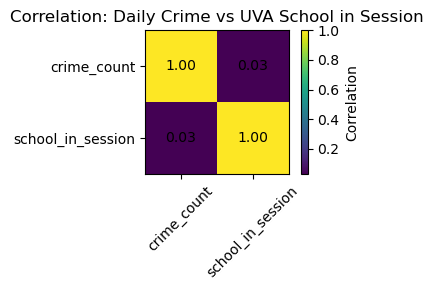

In [64]:
plt.figure(figsize=(4, 3))
plt.imshow(corr_matrix, interpolation="nearest")
plt.xticks(range(2), ["crime_count", "school_in_session"], rotation=45)
plt.yticks(range(2), ["crime_count", "school_in_session"])
plt.colorbar(label="Correlation")

for i in range(2):
    for j in range(2):
        val = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{val:.2f}", ha="center", va="center")

plt.title("Correlation: Daily Crime vs UVA School in Session")
plt.tight_layout()
plt.show()
